### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [3]:
BS_df = pd.read_csv(r"C:\Users\srisa\Downloads\day.csv")

In [4]:
#checking head of the data
BS_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#check the columns of data
BS_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
#check the shape
BS_df.shape

(730, 16)

There are 730 rows and 16 columns in the data set.

In [7]:
#Checking the numerical columns data distribution statistics
BS_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#check dataframe for null and datatype 
BS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# Checking for null values
BS_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 There are no null values in any of the columns

In [10]:
# Checking for the duplicates
BS_df.drop_duplicates(subset=None, inplace=True)
BS_df.shape

(730, 16)

##### After checking the duplicates there are same number of rows and columns so there are no duplicates

In [11]:
#check the size of data
BS_df.size

11680

In [12]:
#check the datatypes of data
BS_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [13]:
#checking the axes of data
BS_df.axes

[Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             720, 721, 722, 723, 724, 725, 726, 727, 728, 729],
            dtype='int64', length=730),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [14]:
#check the dimensions of data
BS_df.ndim

2

In [15]:
#check the values of data
BS_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

## Data Visualisation and  Data Preparation

####  separate numeric and categorical variables 

In [16]:
#numeric_data
BS_df.select_dtypes(include=[np.number])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [17]:
#categorical_data
BS_df.select_dtypes(exclude=[np.number])

,dteday
0,01-01-2018
1,02-01-2018
2,03-01-2018
3,04-01-2018
4,05-01-2018
...,...
725,27-12-2019
726,28-12-2019
727,29-12-2019
728,30-12-2019


In [18]:
#droping the columns
BS_df.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
BS_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
BS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [20]:
BS_df.shape

(730, 12)

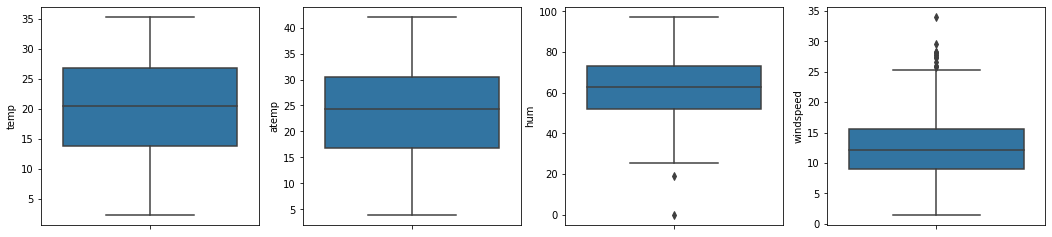

In [21]:
# Finding out the outliers
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=BS_df)
    i+=1

### Inference:
   By looking at the plots clearlly we can notice there are no outliers.

### Converting some numeric data  to categorical data

In [22]:
#season
BS_df.season = BS_df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [23]:
#Checking whether the conversion is done properly or not 
BS_df['season'].astype('category').value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [24]:
#weathersit
BS_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

In [25]:
#Checking whether the conversion is done properly or not 
BS_df['weathersit'].astype('category').value_counts()

good        463
moderate    246
bad          21
Name: weathersit, dtype: int64

In [26]:
#mnth
BS_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)

In [27]:
#Checking whether the conversion is done properly or not 
BS_df['mnth'].astype('category').value_counts()

aug     62
dec     62
jan     62
jul     62
mar     62
may     62
oct     62
apr     60
jun     60
nov     60
sept    60
feb     56
Name: mnth, dtype: int64

In [28]:
#weekday
BS_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)

In [29]:
#Checking whether the conversion is done properly or not 
BS_df['weekday'].astype('category').value_counts()

mon    105
tue    105
fri    104
sat    104
sun    104
thu    104
wed    104
Name: weekday, dtype: int64

In [30]:
# Check the dataframe again
BS_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
# Checking again shape of a dataframe
BS_df.shape

(730, 12)

<Figure size 1080x2160 with 0 Axes>

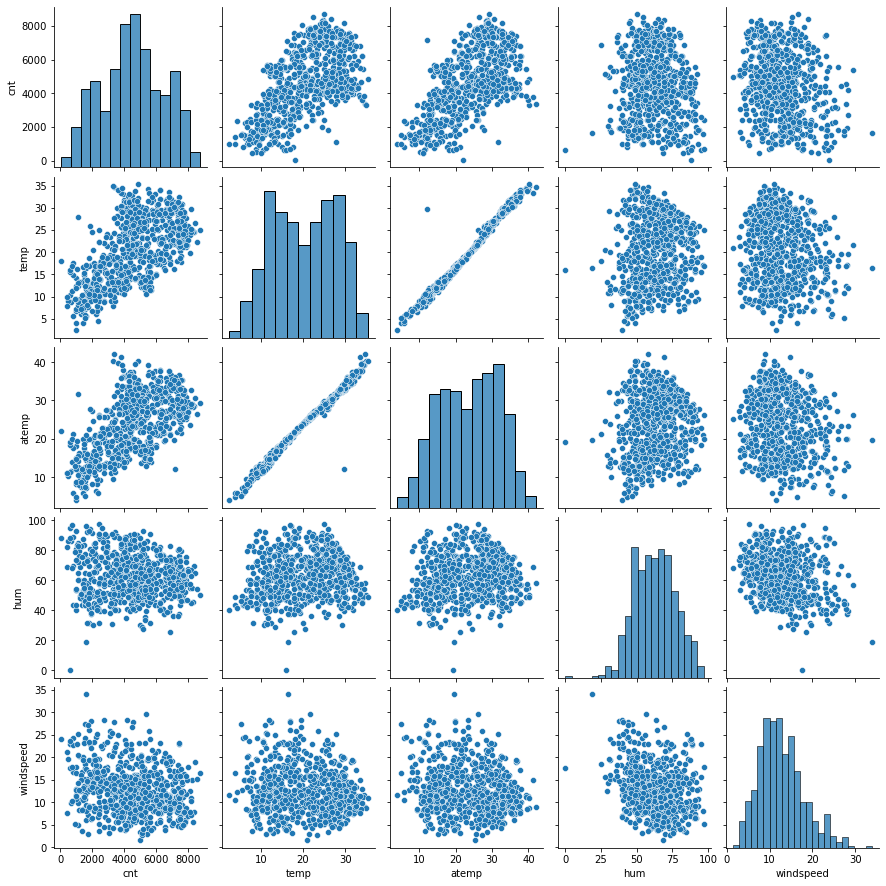

In [32]:
# Visualizing the Numeric Variables
plt.figure(figsize = (15,30))
sns.pairplot(data=BS_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Inference:
   * Looks like the temp and atemp has the highest corelation with the target variable cnt and the temp and atemp are highly        co-related with each other

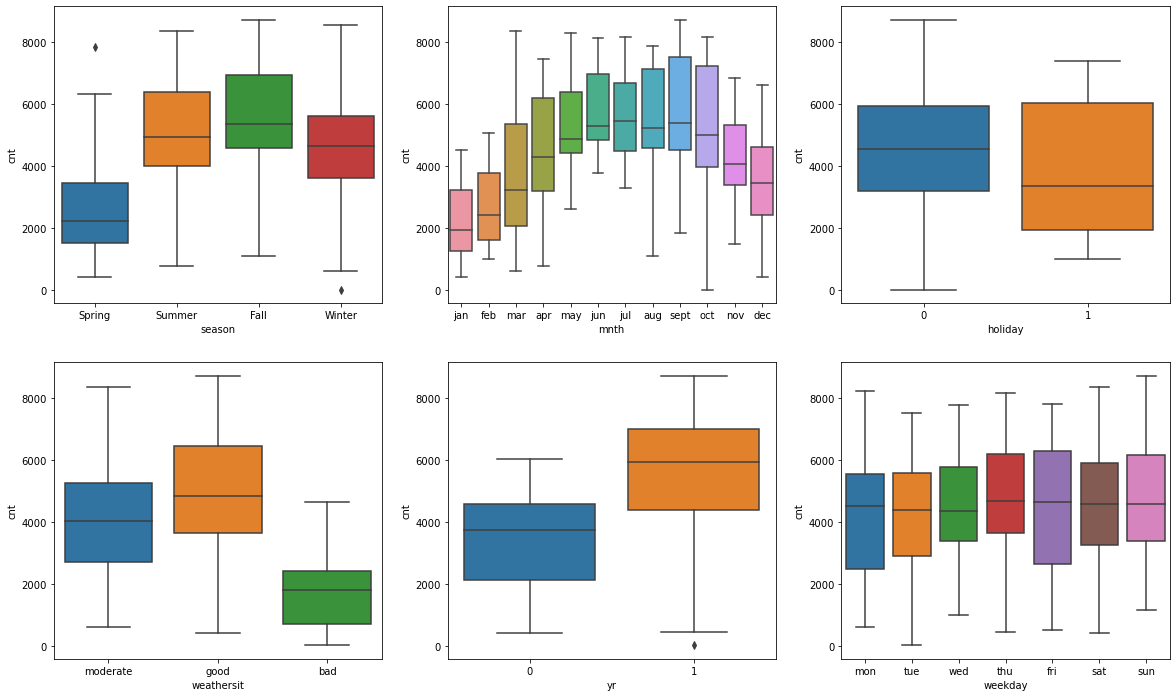

In [33]:
# Visualizing the Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = BS_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_df)
plt.show()

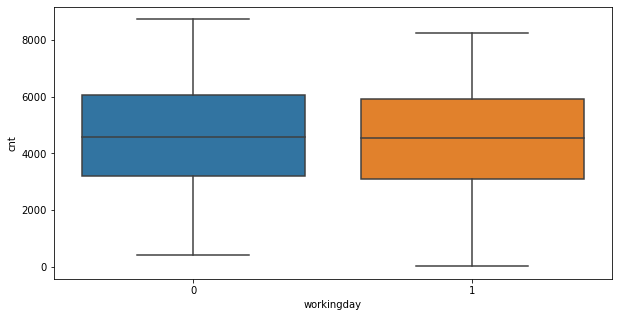

In [34]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = BS_df)
plt.show()

### Inference:
   * The count of bike sharing is least for spring and the number of bike shares incresed in 2019
   * The cnt has zero values for weather situation but the cnt values increases in summer months and the cnt values are less during holidays
   * On workingday the cnt is almost same for both

In [35]:
#Creating dummy variables
dummy = BS_df[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True)

In [36]:
# adding dummy variables to original dataset
BS_df = pd.concat([dummy,BS_df],axis = 1)

In [37]:
# Now we can see again the head of our dataframe.
BS_df.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
# Checking again shape of a dataframe
BS_df.shape

(730, 34)

<Figure size 1440x1440 with 0 Axes>

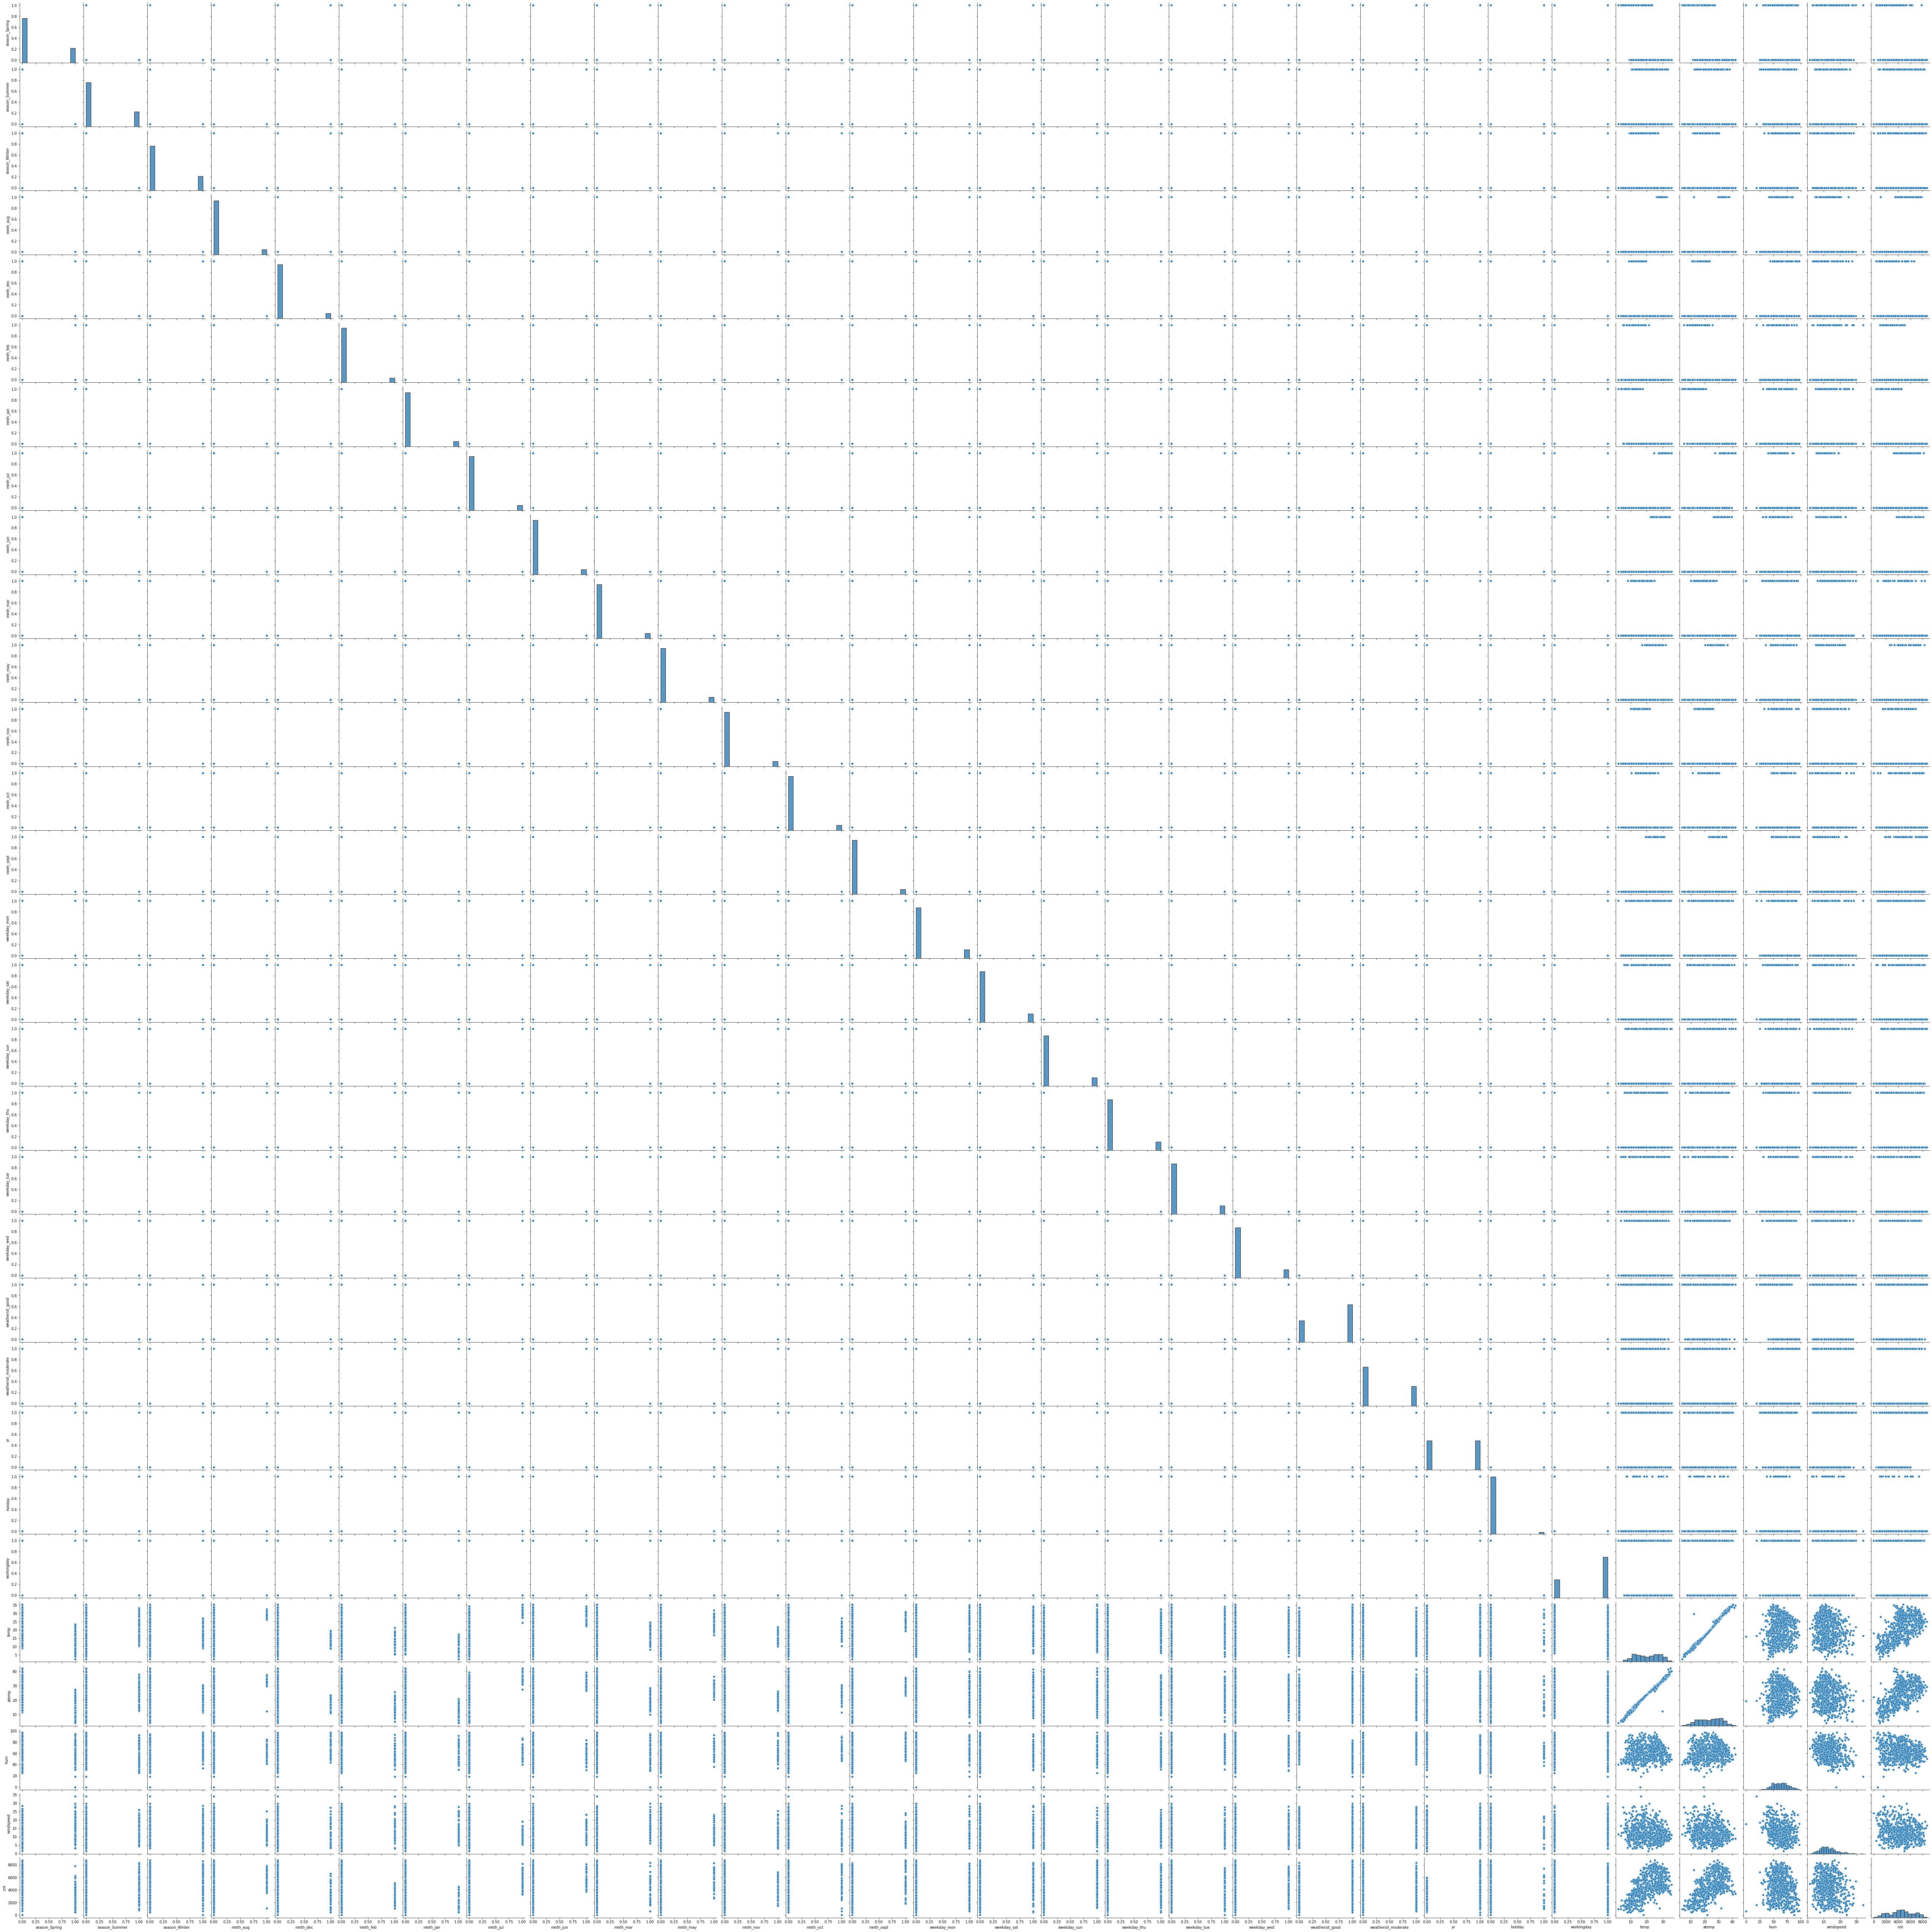

In [39]:
# Visualising the Dataframe to Find the Correlation between the Numerical Variable
plt.figure(figsize=(20,20))
sns.pairplot(BS_df)
plt.show()

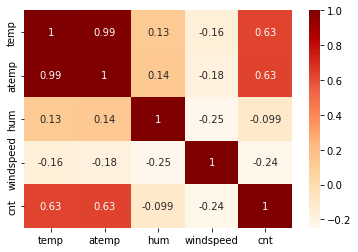

In [40]:
# Checking continuous variables Correlation relationship with each other
sns.heatmap(BS_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='OrRd', annot = True)
plt.show()

### Inference:
   Here we see that temp and atemp has correlation 0.99,that means almost 1 (highly correlated) and atemp seems to be derived      from temp so atemp field can be dropped here 

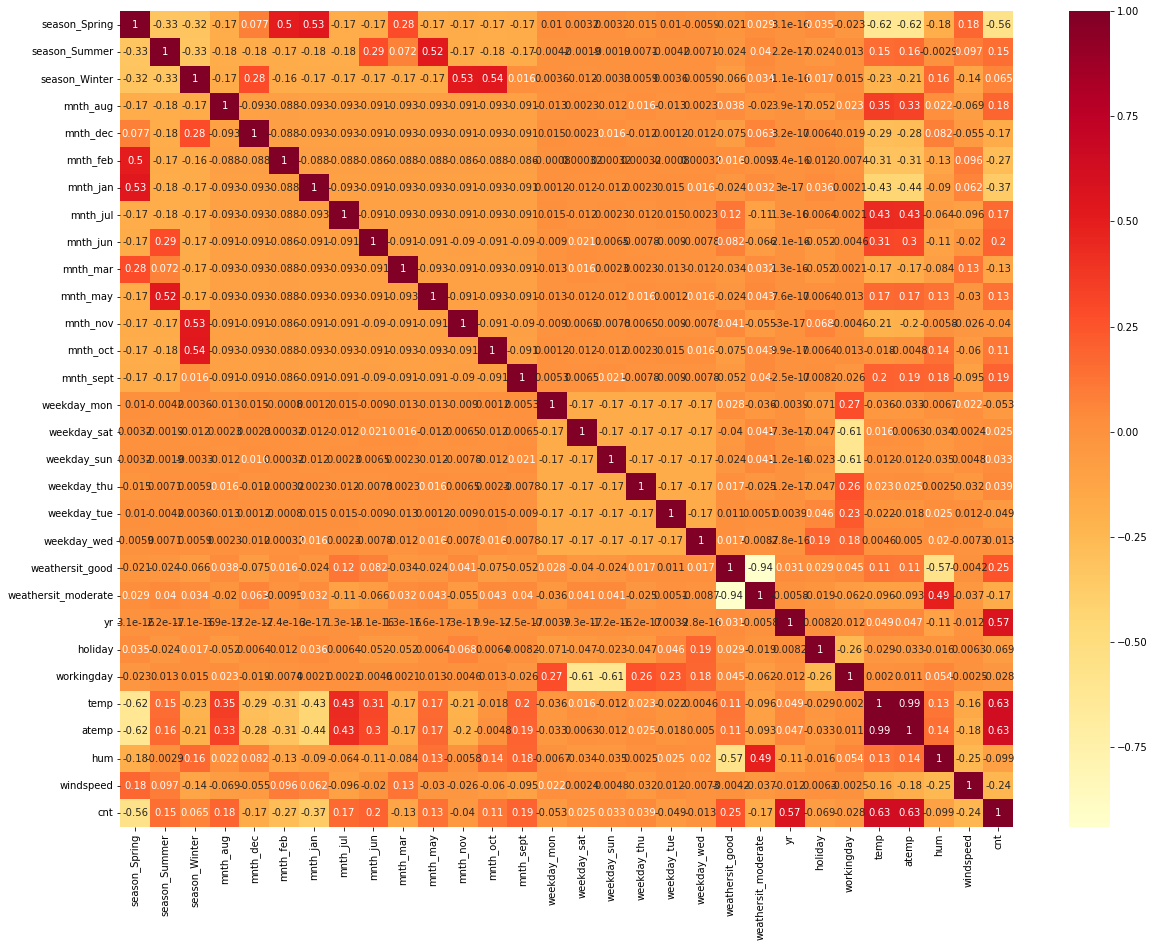

In [41]:
#Correlations for numeric variables
plt.figure(figsize = (20, 15))
cor=BS_df.corr()
sns.heatmap(cor, cmap="YlOrRd", annot = True)
plt.show()

### Inference:
* From the correlation map, season_winter and mnth_oct seems to be highly correlated with 0.54 and only should variable can be considered for the model.
* However let us elminate it based on the Variance Inflation Factor later during the model building.
* We also see Target variable has a linear relationship with some of the indeptendent variables. 
* so that we can drop the atemp variable
* temp variable also highlly corelated with target variable with 0.63

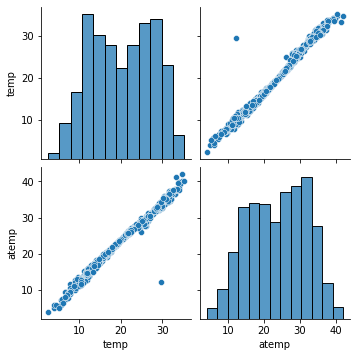

In [42]:
sns.pairplot(BS_df[['temp','atemp']])
plt.show()

### Inference :
   Predictor columns temp and atemp are very much correlated to each other, so we can drop any one of them, here we are dropping atemp variable

In [43]:
#Droping the atemp variable:
BS_df.drop(['atemp'],axis=1,inplace=True)

In [44]:
# check the dataframe again
BS_df.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600


In [45]:
#Checking the dataframe again
BS_df.shape

(730, 33)

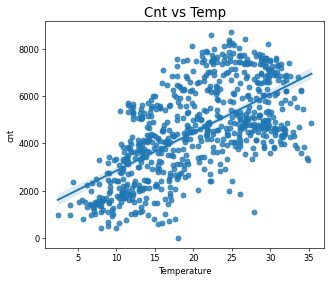

In [46]:
# univariate Analysis for Cnt vs Temp
plt.figure(figsize=(6,5),dpi=60)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=BS_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

### Inference:
  * Demand for bikes is positively correlated to temp.
  * We can see that cnt is linearly increasing with temp indicating linear relation.

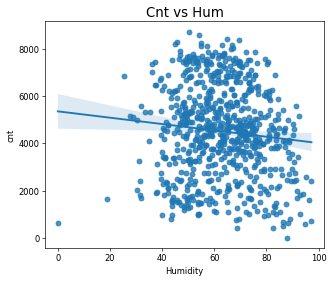

In [47]:
# univariate Analysis for Cnt vs Hum
plt.figure(figsize=(6,5),dpi=60)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=BS_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

### Inference:
* Hum is values are more scattered around.
* Although we can see cnt decreasing with increase in humidity.

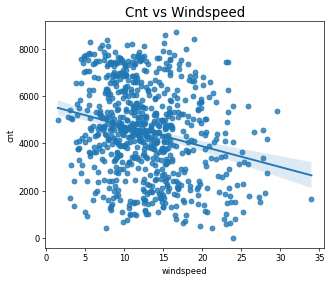

In [48]:
# univariate Analysis for Cnt vs Windspeed
plt.figure(figsize=(6,5),dpi=60)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=BS_df,y="cnt",x="windspeed")
plt.show()

### Inference:
  * Windspeed values are more scattered around. although we can see cnt decreasing with increase in windspeed.

In [49]:
##now we can drop some variables with same meaning and checking for shape
BS_df.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
BS_df.shape

(730, 29)

# Model building:

### Divide the data into train and test

In [50]:
BS_df.shape

(730, 29)

In [51]:
#using train_test_split we are dividing the daraset inti train and test
np.random.seed(0)
BS_df_train, BS_df_test = train_test_split(BS_df, train_size=0.6, test_size=0.3, random_state=100)

In [52]:
#checking shape of train and test dataframes
print("Train_df : ",BS_df_train.shape)
print("Test_df : ",BS_df_test.shape)

Train_df :  (438, 29)
Test_df :  (219, 29)


In [53]:
# Train data set first 5 rows
BS_df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,19.201653,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,29.246653,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,16.980847,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,10.489153,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,15.443347,48.9583,8.708325,4220


In [54]:
# Train data set shape
BS_df_train.shape

(438, 29)

In [55]:
# Train data set statistical values
BS_df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.235160,0.251142,0.251142,0.091324,0.086758,0.063927,0.082192,0.079909,0.075342,0.100457,...,0.123288,0.623288,0.344749,0.518265,0.027397,0.703196,20.154896,63.624442,12.806188,4510.358447
std,0.424584,0.434166,0.434166,0.288399,0.281802,0.244902,0.274971,0.271462,0.264245,0.300952,...,0.329143,0.485116,0.475830,0.500238,0.163425,0.457372,7.358923,13.766511,5.198821,1914.371255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,27.583300,2.834381,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.957087,52.557950,9.166940,3217.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,20.107097,63.625000,12.083182,4545.000000
75%,0.000000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,26.607298,73.250025,15.625589,5921.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,97.041700,28.292425,8714.000000


In [56]:
# Test data set shape
BS_df_test.shape

(219, 29)

In [57]:
## Test data set statistical values
BS_df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.155251,0.652968,0.319635,0.479452,0.036530,0.639269,20.815737,61.961883,12.600130,4546.981735
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.362974,0.477117,0.467403,0.500722,0.188034,0.481313,7.689600,14.456669,4.984858,1898.633630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.957390,25.416700,1.500244,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.093750,51.166700,9.021282,3303.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,20.807500,60.916700,12.167200,4579.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,27.401653,72.192050,15.395629,5869.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.815847,97.250000,27.999836,8395.000000


In [58]:
## Train data set first 5 rows
BS_df_test.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,29.793347,63.7917,5.459106,6043
535,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,32.082500,59.2083,7.625404,6211
299,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,19.270000,81.2917,13.250121,2659
221,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,31.433347,42.4167,13.417286,4780
152,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,29.315000,30.5000,19.583229,4968


In [59]:
#Using Normalized scaler to scale
scaler = MinMaxScaler()

#### Performing scaling on train set

In [60]:
#We can apply scaller to all columns except dummy variables and target variable
scale_columns=['temp','hum','windspeed']
BS_df_train[scale_columns] = scaler.fit_transform(BS_df_train[scale_columns])

In [61]:
# again checking for values are changed or not
BS_df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0.509887,0.406718,0.368230,7534
576,0,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0.815169,0.616677,0.324027,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.497301,0.312589,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0.245101,0.298740,0.811772,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.307738,0.230730,4220


In [62]:
## checking data set statistical values after scaling
BS_df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.235160,0.251142,0.251142,0.091324,0.086758,0.063927,0.082192,0.079909,0.075342,0.100457,...,0.123288,0.623288,0.344749,0.518265,0.027397,0.703196,0.538857,0.518888,0.391696,4510.358447
std,0.424584,0.434166,0.434166,0.288399,0.281802,0.244902,0.274971,0.271462,0.264245,0.300952,...,0.329143,0.485116,0.475830,0.500238,0.163425,0.457372,0.223648,0.198198,0.204211,1914.371255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350497,0.359563,0.248745,3217.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.537404,0.518896,0.363296,4545.000000
75%,0.000000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.734955,0.657469,0.502443,5921.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


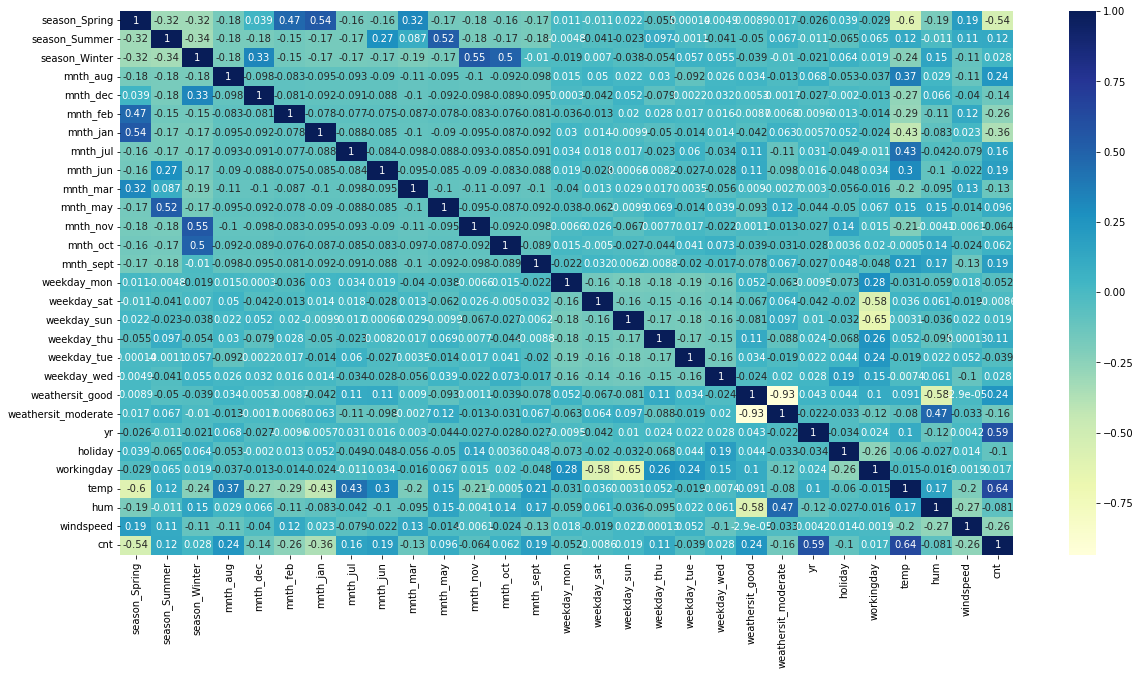

In [63]:
# Let's check the correlation coefficients to see which variables are highly correlated for the train set
plt.figure(figsize = (20, 10))
sns.heatmap(BS_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inference:
* There is multi-colinearity between the variables.
* We need to consider the factors when developing the model.
* workingday variable has high negative correlation with Sat & Sun (where workingday =0)
* Spring is negatively correlated with temp
* weathersit_moderate and humidity (hum)has correlation
* various months and corresponding weather has correlation

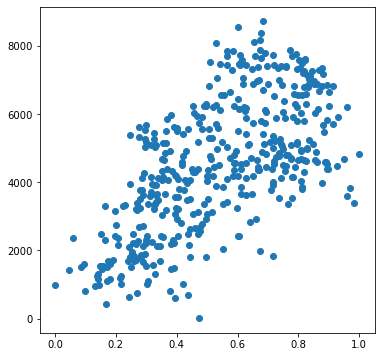

In [64]:
##Let's see a scatterplot for temp vs cnt
plt.figure(figsize=[6,6])
plt.scatter(BS_df_train.temp, BS_df_train.cnt)
plt.show()

### Inference: 
* we pick temp as the first variable and we'll try to fit a regression line to that.

### Divide the Data into Xtrain and Ytrain

In [65]:
#y is contain only target variable
y_train = BS_df_train.pop("cnt")
#X is all remainign variable also our independent variables
X_train = BS_df_train

In [66]:
#Inspect independent variables
X_train.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0.509887,0.406718,0.368230
576,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0.815169,0.616677,0.324027
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0.442393,0.497301,0.312589
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0.245101,0.298740,0.811772
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.395666,0.307738,0.230730


In [67]:
X_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

### Performing linear regression

#### RFE is a Automated approach

In [68]:
# Building a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
#Cuting down the number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [70]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 12),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 10),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 14),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [71]:
#Printing the Columns selected by RFE.
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_good',
       'weathersit_moderate', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [72]:
# rfe not selected variables
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'workingday'],
      dtype='object')

In [73]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Manual Elimination

#### Function to build a model using stats model api

In [74]:
# building a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [75]:
#Function to calculate VIFs and print them.
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Model 1

In [76]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [77]:
# Checking the parameters obtained
lr.params

const                   704.417549
season_Spring          -395.763353
season_Summer           463.271292
season_Winter           958.386056
mnth_aug                425.524737
mnth_dec               -357.630864
mnth_feb               -205.630080
mnth_jan               -480.106998
mnth_jul               -118.768799
mnth_jun                110.305368
mnth_mar                 98.801999
mnth_may                239.982071
mnth_nov               -302.905425
mnth_oct                162.606251
mnth_sept               861.696626
weekday_mon            -205.850986
weekday_sat            -437.811082
weekday_sun            -357.889927
weekday_thu              29.445735
weekday_tue            -257.647150
weekday_wed              27.737813
weathersit_good        2184.240714
weathersit_moderate    1695.013378
yr                     1973.985846
holiday               -1100.670017
workingday             -415.210773
temp                   3656.340915
hum                    -880.756101
windspeed           

In [78]:
# Printing a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     81.31
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          2.30e-148
Time:                        15:51:20   Log-Likelihood:                -3518.9
No. Observations:                 438   AIC:                             7096.
Df Residuals:                     409   BIC:                             7214.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 704.4175    

## Inference:
   The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (<        0.05) indicates that you can reject the null hypothesis. Predictor that has a low p-value is likely to be a meaningful          addition to th model. SO we can drop variables having p value > 0.05

In [79]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_mar', 1)

## Model 2

In [80]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
# Printing the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     84.48
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          2.72e-149
Time:                        15:52:03   Log-Likelihood:                -3519.0
No. Observations:                 438   AIC:                             7094.
Df Residuals:                     410   BIC:                             7208.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 769.2389    

In [82]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_jun', 1)

## Model 3

In [83]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [84]:
# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     87.91
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.07e-150
Time:                        15:52:08   Log-Likelihood:                -3519.0
No. Observations:                 438   AIC:                             7092.
Df Residuals:                     411   BIC:                             7202.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 771.1669    

In [85]:
# We have high P value for mnth_October feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_oct', 1)

## Model 4

In [86]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [87]:
# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     91.64
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.24e-151
Time:                        15:52:19   Log-Likelihood:                -3519.1
No. Observations:                 438   AIC:                             7090.
Df Residuals:                     412   BIC:                             7196.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 796.1933    

In [88]:
# We have high P value for weekday_Wednesday feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_thu', 1)

## Model 5

In [89]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [90]:
# Printing the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     95.68
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.34e-152
Time:                        15:52:32   Log-Likelihood:                -3519.1
No. Observations:                 438   AIC:                             7088.
Df Residuals:                     413   BIC:                             7190.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 805.3337    

In [91]:
# We have high P value for weekday_Sunday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_sun', 1)

## Model 6

In [92]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [93]:
# Printing the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.98
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.93e-153
Time:                        15:52:40   Log-Likelihood:                -3519.3
No. Observations:                 438   AIC:                             7087.
Df Residuals:                     414   BIC:                             7185.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 434.4323    

In [94]:
# Calculating the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,temp,27.60
15,weathersit_good,19.36
21,hum,14.41
16,weathersit_moderate,9.66
0,season_Spring,8.86
19,workingday,7.12
1,season_Summer,7.11
2,season_Winter,6.59
22,windspeed,4.99
3,mnth_aug,3.21


### Inference:
* Hear am choosing the  variable  with high p-value and high VIF value
* The variable workingday has a significantly high VIF (7.12) and a high p-value (0.661) as well. Hence, this variable isn't     much use and it should be dropped.

In [95]:
# We have high P value for workingday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('workingday', 1)

## Model 7

In [96]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [97]:
# Printing the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     104.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          4.17e-154
Time:                        15:53:43   Log-Likelihood:                -3519.4
No. Observations:                 438   AIC:                             7085.
Df Residuals:                     415   BIC:                             7179.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 402.6594    

In [98]:
# We have high P value for weekday_Saturday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_sat', 1)

## Model 8

In [99]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [100]:
# Printing the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     109.9
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          4.41e-155
Time:                        15:53:59   Log-Likelihood:                -3519.5
No. Observations:                 438   AIC:                             7083.
Df Residuals:                     416   BIC:                             7173.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 400.1036    

In [101]:
# We have high P value for mnth_August feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_aug', 1)

## Model 9

In [102]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [103]:
# Printing the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          9.39e-156
Time:                        15:54:11   Log-Likelihood:                -3520.4
No. Observations:                 438   AIC:                             7083.
Df Residuals:                     417   BIC:                             7169.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 549.5373    

In [104]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_wed', 1)

## Model 10

In [105]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [106]:
# Printing the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     121.5
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          8.53e-157
Time:                        15:54:35   Log-Likelihood:                -3520.4
No. Observations:                 438   AIC:                             7081.
Df Residuals:                     418   BIC:                             7162.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 554.1164    

In [107]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_may', 1)

## Model 11

In [108]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [109]:
# Printing the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     128.1
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.33e-157
Time:                        15:54:58   Log-Likelihood:                -3521.0
No. Observations:                 438   AIC:                             7080.
Df Residuals:                     419   BIC:                             7158.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 468.9218    

In [110]:
# We have high P value for mnth_Feb feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_feb', 1)

## Model 12

In [111]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Creating a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [112]:
# Printing the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     135.1
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.29e-158
Time:                        15:55:12   Log-Likelihood:                -3522.2
No. Observations:                 438   AIC:                             7080.
Df Residuals:                     420   BIC:                             7154.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 373.3560    

In [113]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,temp,25.15
10,weathersit_good,16.77
15,hum,13.26
11,weathersit_moderate,8.65
0,season_Spring,5.51
16,windspeed,4.82
2,season_Winter,4.35
1,season_Summer,3.33
12,yr,2.17
6,mnth_nov,2.04


In [114]:
# Checking the parameters obtained
lr_11.params

const                   373.356005
season_Spring          -640.685001
season_Summer           296.833875
season_Winter           844.604269
mnth_dec               -421.954889
mnth_jan               -415.857988
mnth_jul               -472.462477
mnth_nov               -435.969160
mnth_sept               573.918387
weekday_mon            -214.212170
weekday_tue            -280.550517
weathersit_good        2225.682425
weathersit_moderate    1739.163493
yr                     1968.101978
holiday                -773.376363
temp                   3921.803101
hum                    -830.768203
windspeed             -1253.448835
dtype: float64

###  Residual Analysis of the train data

In [116]:
y_train_pred = lr_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

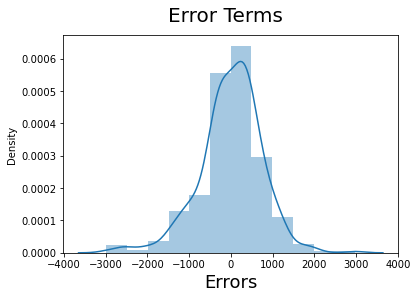

In [117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### Inference:
.   By looking at the plot it shows clearlly the distplot is like normalality curve

#### Making Predictions Using the Final Model

In [118]:
num_columns=['temp','hum','windspeed']
BS_df_test[num_columns] = scaler.transform(BS_df_test[num_columns])

In [119]:
BS_df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.155251,0.652968,0.319635,0.479452,0.036530,0.639269,0.558941,0.494952,0.383602,4546.981735
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.362974,0.477117,0.467403,0.500722,0.188034,0.481313,0.233698,0.208134,0.195807,1898.633630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,-0.031193,-0.052405,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.339533,0.243023,3303.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.479905,0.366596,4579.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.642237,0.493410,5869.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002999,0.988507,8395.000000


### Dividing the data into X_test and y_test

In [120]:
y_test = BS_df_test.pop('cnt')
X_test = BS_df_test

In [121]:
X_test.shape

(219, 28)

In [122]:
y_test.shape

(219,)

In [123]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [124]:
X_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_mon',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [125]:
X_test_m.columns

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [126]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['mnth_mar','mnth_jun','mnth_oct','weekday_thu','weekday_sun','workingday','weekday_sat',
             'mnth_aug','weekday_wed','mnth_may','mnth_feb']
X_test_m = X_test_m.drop(drop_cols, axis = 1)

In [127]:
y_pred_m = lr_11.predict(X_test_m)

# Modeal evaluation:
. check the various assumptions
. check the R square  and adjusted R square
. Report the final model

# Validating the assumption of Linear Regression Model :
#####  check the various assumptions

* Linear Relationship
* Homoscedasticity
* Absence of Multicollinearity
* Independence of residuals
* Normality of Errors

# Linear Relationship

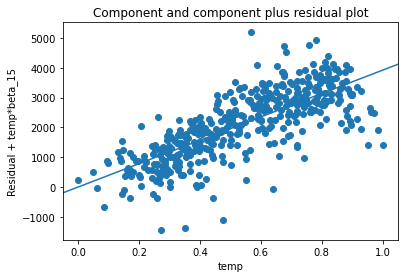

In [128]:
sm.graphics.plot_ccpr(lr_11, 'temp')
plt.show()

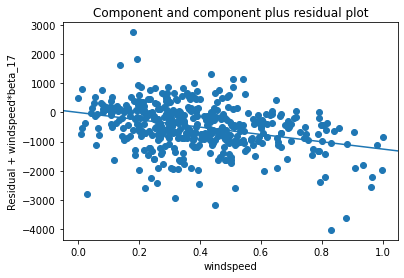

In [129]:
sm.graphics.plot_ccpr(lr_11, 'windspeed')
plt.show()

### Inference:
.   The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well     preserved

# Homoscedasticity

Text(0, 0.5, 'y_pred')

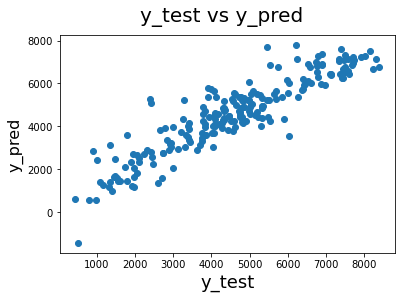

In [130]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)

### Inference:
* There is no visible pattern in residual values.
* We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much   as the value of the predictor variable changes.

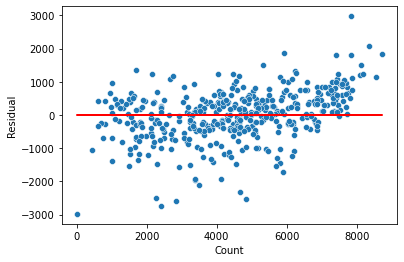

In [131]:
y_train_pred = lr_11.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Inference:
.    There is no visible pattern in residual values, thus homoscedacity is well preserved

# Absence of Multicolinearity

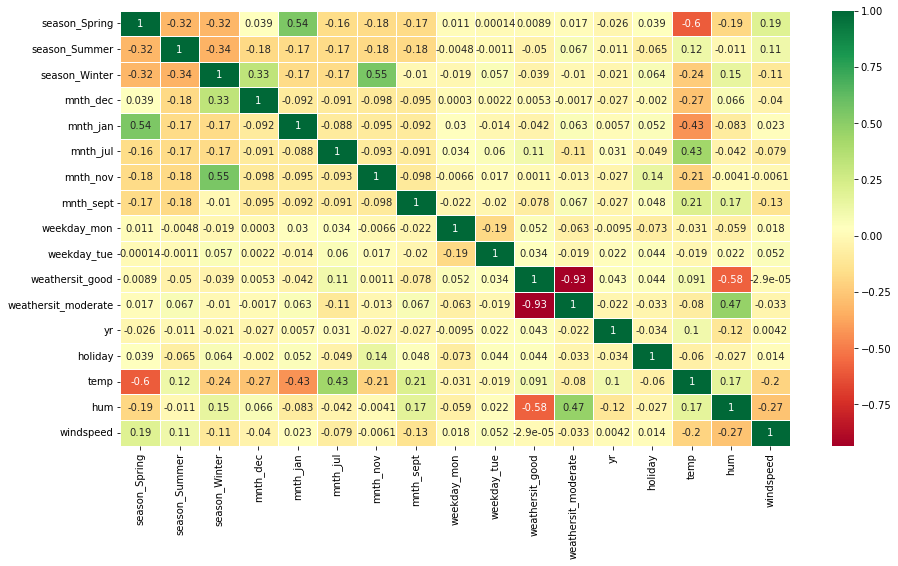

In [132]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

### Inference:
 * By observing the corelation matrix/heat map,we can notice some best points that are:
 * The season_spring and mnth_jan are  positivelly high corelated with 0.54
 * The season_winter and mnth_nov are positivelly corelated with 0.55

# Independence of residuals

Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.

0 – 2: positive auto-correlation
2 – 4: negative auto-correlation

In [133]:
print('The Durbin-Watson value for Final Model lr_11 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr_11 is 1.9732


### Inference:
   There is almost no autocorrelation.

# Normality of error

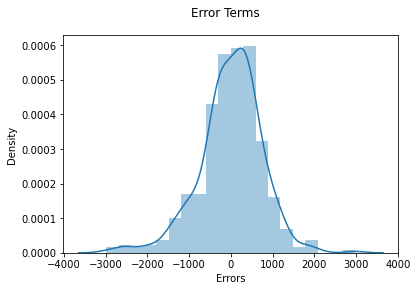

In [134]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

### Inference:
.  The bins are normally distributed

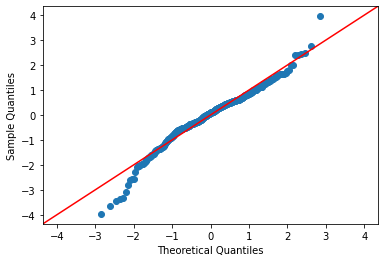

In [135]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### Inference: 
   * Based on the histogram, we can conclude that error terms are following a normal distribution

# Making Predictions using final model

In [136]:
num_vars = ['temp','hum', 'windspeed']
BS_df_test[num_vars] = scaler.transform(BS_df_test[num_vars])
BS_df_test.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,-0.048400,-0.389615,-0.107286
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,-0.046286,-0.390565,-0.103943
299,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,-0.058120,-0.385987,-0.095265
221,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,-0.046886,-0.394045,-0.095007
152,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,-0.048842,-0.396515,-0.085493


In [137]:
BS_df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.123288,0.155251,0.652968,0.319635,0.479452,0.036530,0.639269,-0.056692,-0.389994,-0.096267
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.329520,0.362974,0.477117,0.467403,0.500722,0.188034,0.481313,0.007102,0.002997,0.007691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.072263,-0.397569,-0.113394
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.062901,-0.392231,-0.101789
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-0.056700,-0.390210,-0.096935
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-0.050609,-0.387873,-0.091954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.043761,-0.382679,-0.072507


In [138]:
#Selecting the variables that were part of final model.
col1=X_train.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_11 = sm.add_constant(X_test)

X_test_lm_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                219 non-null    float64
 1   season_Spring        219 non-null    uint8  
 2   season_Summer        219 non-null    uint8  
 3   season_Winter        219 non-null    uint8  
 4   mnth_dec             219 non-null    uint8  
 5   mnth_jan             219 non-null    uint8  
 6   mnth_jul             219 non-null    uint8  
 7   mnth_nov             219 non-null    uint8  
 8   mnth_sept            219 non-null    uint8  
 9   weekday_mon          219 non-null    uint8  
 10  weekday_tue          219 non-null    uint8  
 11  weathersit_good      219 non-null    uint8  
 12  weathersit_moderate  219 non-null    uint8  
 13  yr                   219 non-null    int64  
 14  holiday              219 non-null    int64  
 15  temp                 219 non-null    fl

In [139]:
X_test_lm_11.columns

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_mon',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [140]:
# Making predictions using the final model (lr_11)

y_pred = lr_11.predict(X_test_m)
y_pred

184    3566.464352
535    7784.761345
299    3809.728763
221    5358.123698
152    5241.419420
          ...     
400    3235.589269
702    6043.552106
127    4375.939818
640    7149.882782
72     2682.037018
Length: 219, dtype: float64

Text(0, 0.5, 'y_pred')

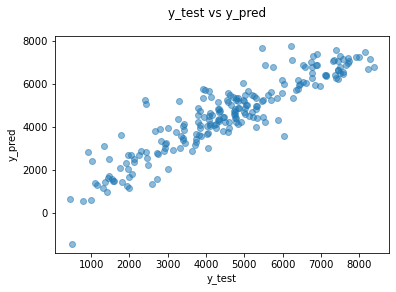

In [141]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

#### R2 Value Calculation for data_test dataframe

In [142]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8285

#### R2 Value Calculation for data_train dataframe

In [143]:
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))

Train R-Score:  0.8454124381869348


#### Adjusted R2 Value Calculation for data_test dataframe

In [144]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.814

#### Adjusted R2 Value Calculation for data_train dataframe

In [145]:
# n is number of rows in train dataset
n = X_train.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8216

#### Calculating RMSE for the selected Model

In [146]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

784.5418

#### Calculating Mean Absolute Error for the selected Model

In [147]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

585.6349

### Inference: 
  * The Root Mean Squared Error value for the test dataset based on final model is 784.5418 and Mean Absolute Error is             585.6349, which indicates that the model is good.
Note: The MAE and RMSE can range from 0 to ∞. They are negatively-oriented scores: Lower values are better.


#### Intrepretting the Model

#### Reporting the final model

Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [148]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['season_Spring', 'season_Summer', 'season_Winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_mon',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'temp', 'hum', 'windspeed']
lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     135.1
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.29e-158
Time:                        16:00:33   Log-Likelihood:                -3522.2
No. Observations:                 438   AIC:                             7080.
Df Residuals:                     420   BIC:                             7154.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 373.3560    

## Model Outcome Summary

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

### After Analysing the above model, the comapany should focus on the following features:
 * Company should focus on expanding business during Spring.
 * Company should focus on expanding business during September.
 * Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to   2019.
 * There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

### Significant variables to predict the demand for shared bikes
   * holiday
   * temp
   * hum
   * windspeed
   * Season(Spring,Summer,Winter)
   * months(January, July, September, November, December)
   * Year (2019)
   * Monday and Tuesday
   * weathersit(good,moderate)